In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("Topic_Survey_Assignment.csv", index_col=0)

In [3]:
df

,Very interested,Somewhat interested,Not interested
Big Data (Spark / Hadoop),1332,729,127
Data Analysis / Statistics,1688,444,60
Data Journalism,429,1081,610
Data Visualization,1340,734,102
Deep Learning,1263,770,136
Machine Learning,1629,477,74


In [4]:
df.columns.values

array(['Very interested', 'Somewhat interested', 'Not interested'],
      dtype=object)

In [5]:
df.index.values

array(['Big Data (Spark / Hadoop)', 'Data Analysis / Statistics',
       'Data Journalism', 'Data Visualization', 'Deep Learning',
       'Machine Learning'], dtype=object)

In [6]:
df.rename(columns = {"Unnamed: 0":"Data_Science_Topics"}, inplace=True)

In [7]:
df.columns

Index(['Very interested', 'Somewhat interested', 'Not interested'], dtype='object')

In [10]:
# df.set_index("Data_Science_Topics")

In [11]:
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt


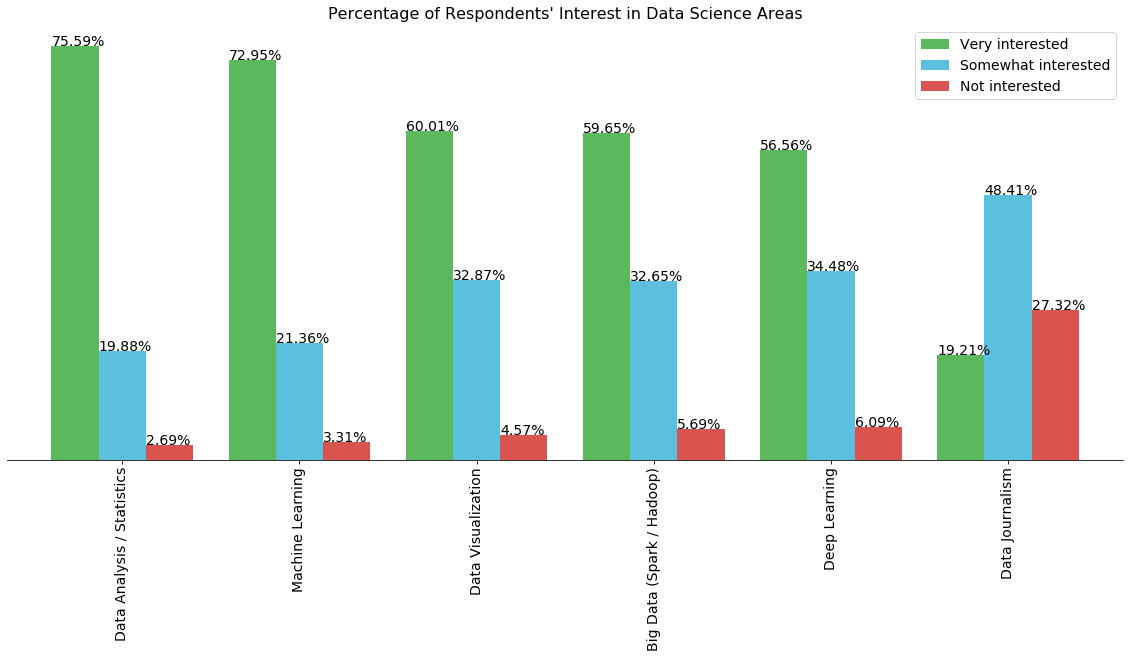

In [12]:
df.sort_values(['Very interested'], ascending=False, axis=0, inplace=True)
graph = df.plot(kind='bar', figsize=(20, 8), width=0.8, color=['#5cb85c', '#5bc0de', '#d9534f'], fontsize=14)
graph.set_title("Percentage of Respondents' Interest in Data Science Areas", size=16) 
graph.spines['left'].set_visible(False)
graph.spines['top'].set_visible(False)
graph.spines['right'].set_visible(False)
graph.yaxis.set_major_locator(plt.NullLocator())
for p in graph.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    graph.annotate('{:.2%}'.format(height/2233), (x, y + height + 0.01), size=14)
graph.legend(fontsize=14)
plt.show()

In [13]:
df1 = pd.read_csv("Police_Department_Incidents_-_Previous_Year__2016_.csv")

In [14]:
df1.head(3)

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212120
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212168
2,141059263,WARRANTS,WARRANT ARREST,Monday,04/25/2016 12:00:00 AM,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",14105926363010


In [15]:
df1['PdDistrict'].value_counts()

SOUTHERN      28445
NORTHERN      20100
MISSION       19503
CENTRAL       17666
BAYVIEW       14303
INGLESIDE     11594
TARAVAL       11325
TENDERLOIN     9942
RICHMOND       8922
PARK           8699
Name: PdDistrict, dtype: int64

In [16]:
df1.shape

(150500, 13)

In [17]:
df1.groupby(['PdDistrict']).groups.keys()

dict_keys(['BAYVIEW', 'CENTRAL', 'INGLESIDE', 'MISSION', 'NORTHERN', 'PARK', 'RICHMOND', 'SOUTHERN', 'TARAVAL', 'TENDERLOIN'])

In [18]:
df_crime = df1.groupby('PdDistrict')['PdId'].count().reset_index()
df_crime

,PdDistrict,PdId
0,BAYVIEW,14303
1,CENTRAL,17666
2,INGLESIDE,11594
3,MISSION,19503
4,NORTHERN,20100
5,PARK,8699
6,RICHMOND,8922
7,SOUTHERN,28445
8,TARAVAL,11325
9,TENDERLOIN,9942


In [19]:
df_crime.rename(columns={'PdDistrict':'Neighborhood', 'PdId':'Count'}, inplace=True)

In [20]:
df_crime

,Neighborhood,Count
0,BAYVIEW,14303
1,CENTRAL,17666
2,INGLESIDE,11594
3,MISSION,19503
4,NORTHERN,20100
5,PARK,8699
6,RICHMOND,8922
7,SOUTHERN,28445
8,TARAVAL,11325
9,TENDERLOIN,9942


In [21]:
import folium

In [27]:
world_map = folium.Map()
# display world map
world_map

In [29]:
!wget --quiet https://cocl.us/sanfran_geojson -O sanfran_geo.json 
# print('GeoJSON file downloaded!')

'wget' is not recognized as an internal or external command,
operable program or batch file.


In [26]:
sf_geo = 'san-francisco.json'
# San Francisco latitude and longitude values
latitude = 37.77
longitude = -122.42

# create a plain world map
sanfran_map = folium.Map(location=[latitude, longitude], zoom_start=12)

# generate choropleth map
sanfran_map.choropleth(
    geo_data=sf_geo,
    data=df_crime,
    columns=['Neighborhood', 'Count'],
    key_on='feature.properties.DISTRICT',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Crime Rate in San Fransisco'
)

sanfran_map

FileNotFoundError: [Errno 2] No such file or directory: 'san-francisco.json'